# BERT Fine-tuning results

In [3]:
import wandb
import matplotlib.pyplot as plt

In [4]:
wandb.login(key='')
api = wandb.Api()

project_name = "bert-multiling-training"

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/gustaw/.netrc
wandb: Currently logged in as: gustaw-blachowski (sf-kozlowski-university-of-warsaw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [5]:
runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")
history = runs[0].history()
history.head()

,_step,_runtime,train/loss,train/grad_norm,train/learning_rate,train/epoch,_timestamp,train/global_step,eval/loss,eval/f1,...,eval/runtime,eval_f1,eval_accuracy,eval_recall,eval_runtime,eval_steps_per_second,epoch,eval_precision,eval_samples_per_second,eval_loss
0,0,4.125427,0.2486,0.990125,0.000016,0.625,1.740405e+09,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.834053,NaN,NaN,NaN,1.000,1.740405e+09,16,0.128959,0.372881,...,0.1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6.593615,0.1076,3.261434,0.000012,1.250,1.740405e+09,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7.424357,0.0718,0.175866,0.000008,1.875,1.740405e+09,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7.742770,NaN,NaN,NaN,2.000,1.740405e+09,32,0.130456,0.372881,...,0.1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
history.columns

Index(['_step', '_runtime', 'train/loss', 'train/grad_norm',
       'train/learning_rate', 'train/epoch', '_timestamp', 'train/global_step',
       'eval/loss', 'eval/f1', 'eval/precision', 'eval/accuracy',
       'eval/recall', 'eval/steps_per_second', 'eval/samples_per_second',
       'eval/runtime', 'eval_f1', 'eval_accuracy', 'eval_recall',
       'eval_runtime', 'eval_steps_per_second', 'epoch', 'eval_precision',
       'eval_samples_per_second', 'eval_loss'],
      dtype='object')

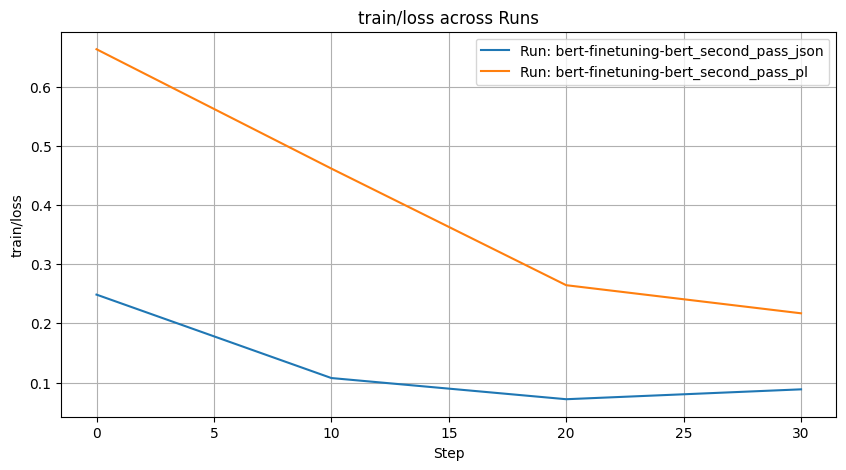

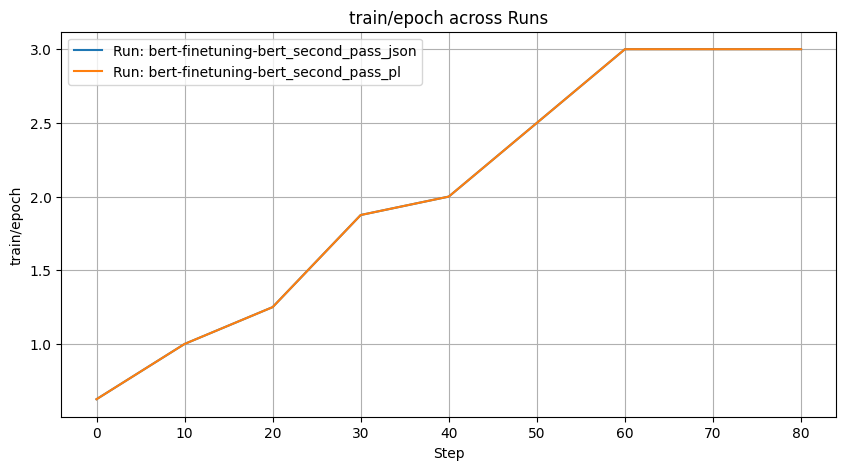

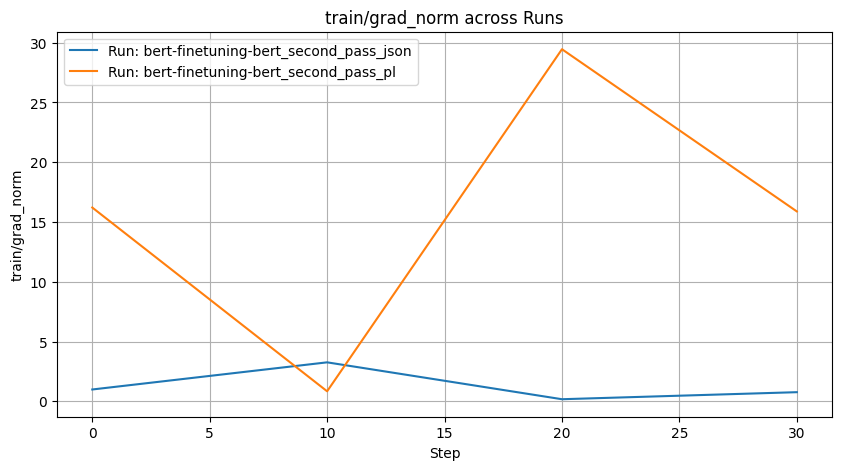

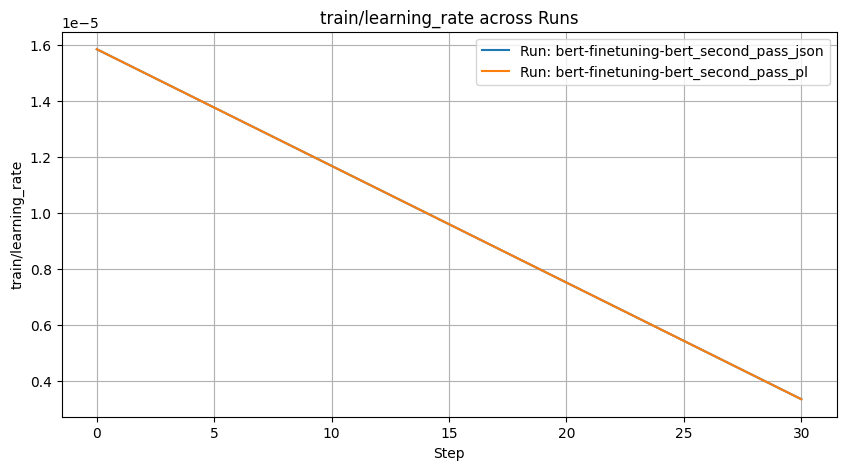

In [7]:
def plot_runs_data(runs, metric):
    plt.figure(figsize=(10, 5))
    for run in runs:
        hist = run.history()
        if hist.shape[0] == 0:
            continue
        if metric in hist.columns:
            # filter-out nans
            data = hist[metric].dropna()
            labels = [x*10 for x in range(data.shape[0])]
            #print(hist.columns)
            #print(hist[metric])
            plt.plot(labels, data, label=f"Run: {run.name}")

    plt.xlabel("Step")
    plt.ylabel(metric)
    plt.title(f"{metric} across Runs")
    plt.legend()
    plt.grid()
    plt.show()

plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/epoch")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

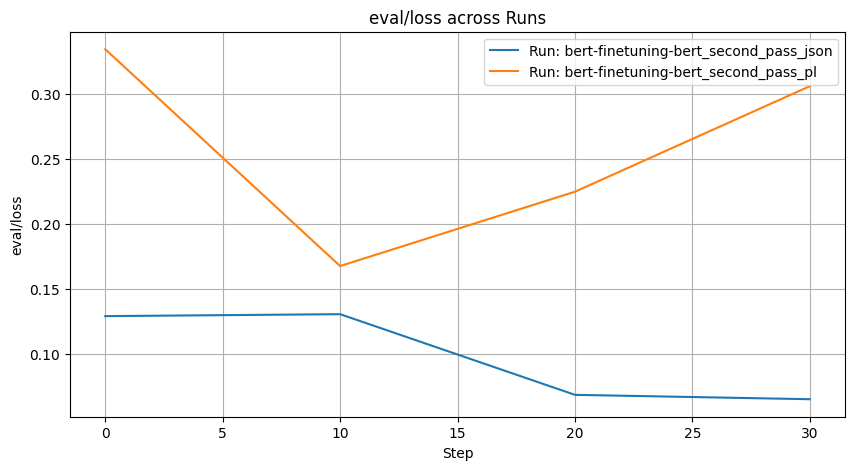

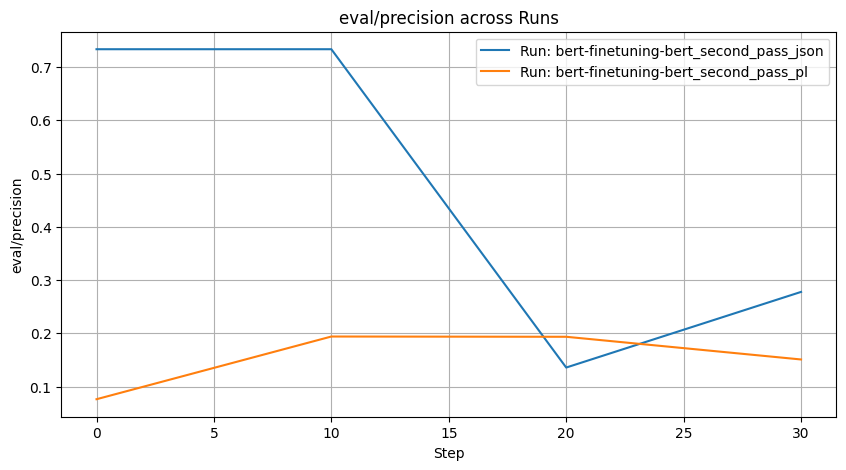

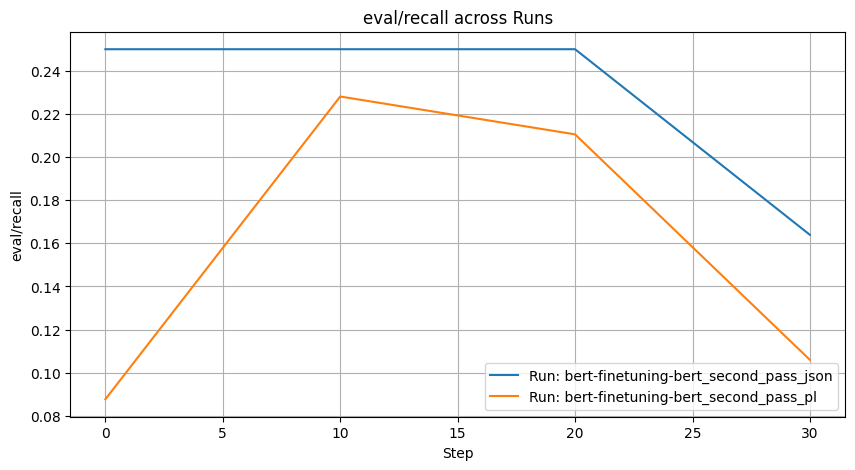

In [8]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")